In [77]:
import matplotlib.pyplot as plt
import numpy as np

In [78]:
def ReLU(x, debug=False):
    '''@returns y'''
    if debug:
        print("ReLU x input:", x)
    if x > 0:
        if debug:
            print("Returning x:", x)
        return x
    else:
        if debug:
            print("Returning 0")
        return 0

In [79]:
def run_ReLU_neuron(weight=1, bias=0, x_inputs=[], no_x_lower_bound=-5, no_x_upper_bound=5, debug=False, plot=False):
    '''Defaults to lower_bound->upper_bound if no x_inputs provided'''
    relu_inputs = []
    y_results = []

    if len(x_inputs) > 0:
        for i in range(len(x_inputs)):
            relu_input = (np.dot(x_inputs[i], weight)) + bias
            relu_inputs.append(relu_input)

            y_results.append(ReLU(relu_input))
    else:
        for i in range(no_x_lower_bound, no_x_upper_bound):
            x_inputs.append(i)
            relu_input = (np.dot(i, weight)) + bias
            relu_inputs.append(relu_input)

            y_results.append(ReLU(relu_input))

    if debug:
        print("*****")
        print("Weight:", weight, "Bias:", bias)
        print("X Inputs:", x_inputs)
        print("RELU Inputs:", relu_inputs)
        print("Y Results:", y_results)
    if plot:
        plt.plot(x_inputs, y_results)
        plt.xlabel("x (Orig Input Before Weight & Bias)")
        plt.ylabel("y (ReLU output)")
        plt.show()

    return y_results

In [80]:
X = []
for i in range(-5, 5):
    X.append(i)

X

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]

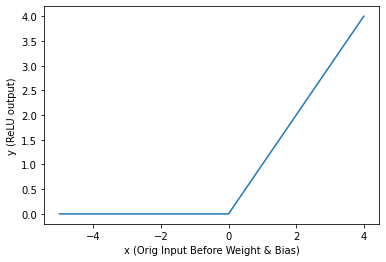

[0, 0, 0, 0, 0, 0, 1, 2, 3, 4]

In [81]:
run_ReLU_neuron(weight=1, bias=0, x_inputs=X, plot=True)

In [82]:
y1 = run_ReLU_neuron(weight=-1, bias=0.5, x_inputs=X)

In [83]:
y2 = run_ReLU_neuron(weight=1, bias=1, x_inputs=y1)

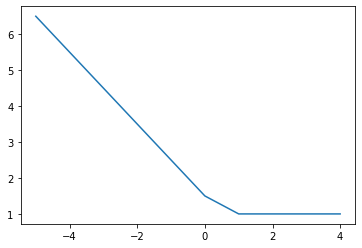

In [84]:
plt.plot(X, y2)